<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [1]:
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\mathi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Function

In [3]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
#Load dataset breast cancer
data = load_breast_cancer()

In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
bdd = pd.DataFrame(data['data'], columns=data['feature_names'])

# Ajout de la colonne cible
bdd['target'] = data['target']

In [8]:
bdd.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
bdd.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### Standardisation

Étant donné les écarts d'échelle significatifs entre les variables de notre dataset, il est essentiel de les standardiser dès cette étape. La standardisation permet de ramener toutes les variables à une échelle comparable, en centrant les données autour de zéro avec une variance unitaire. Cela est particulièrement important pour garantir que les algorithmes de machine learning, sensibles aux échelles des données fonctionnent de manière optimale et produisent des résultats fiables.

In [11]:
X = bdd.drop(columns=['target']) 
y = bdd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

###### Statistiques univariées

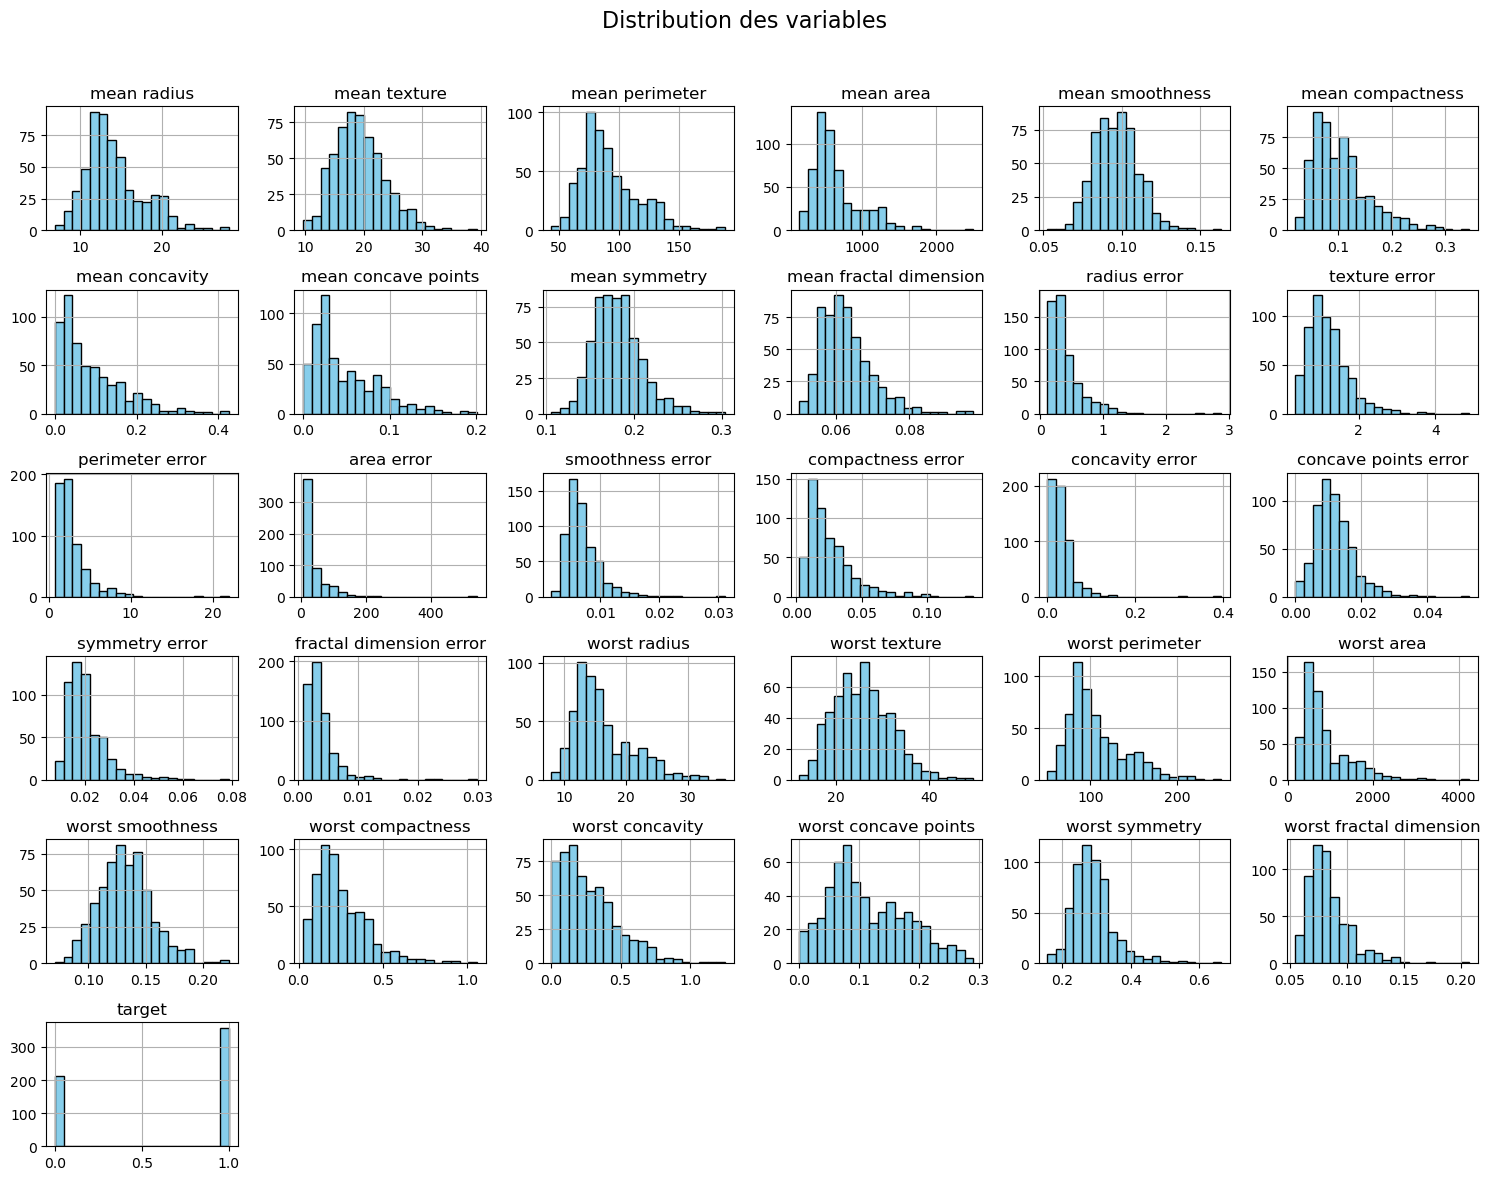

In [12]:
bdd.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

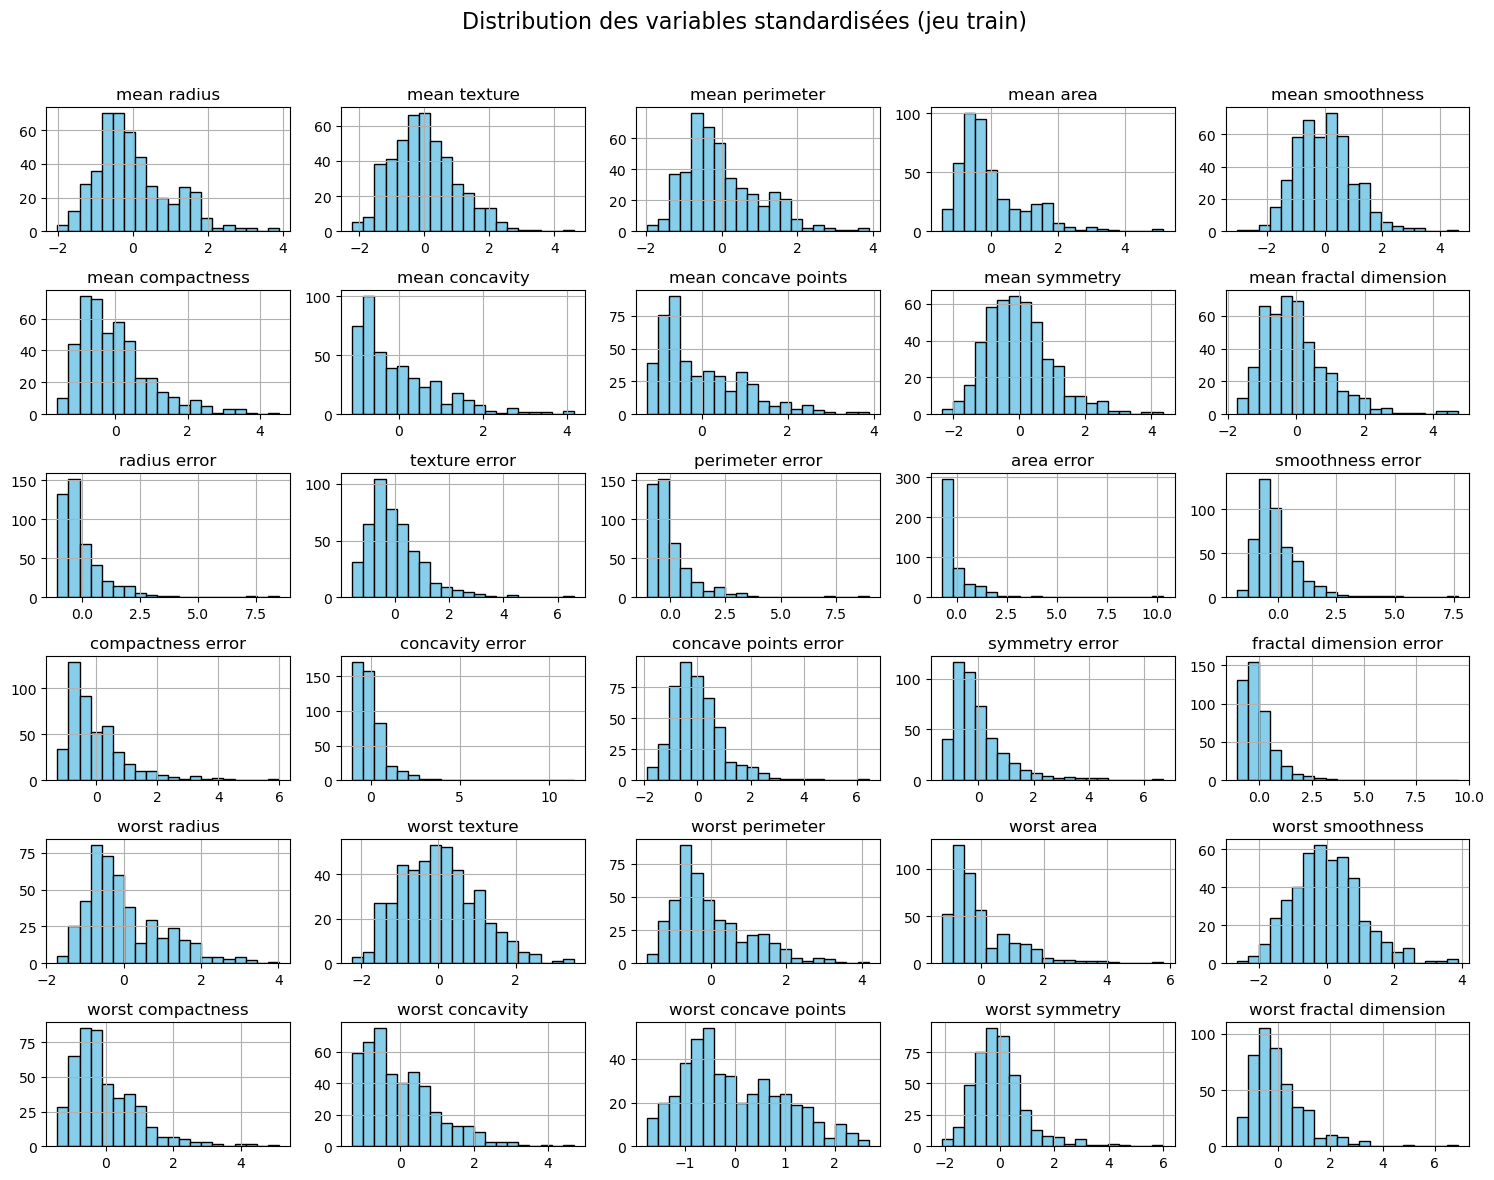

In [13]:
X_train_scaled.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables standardisées (jeu train)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###### Statistiques bivariées

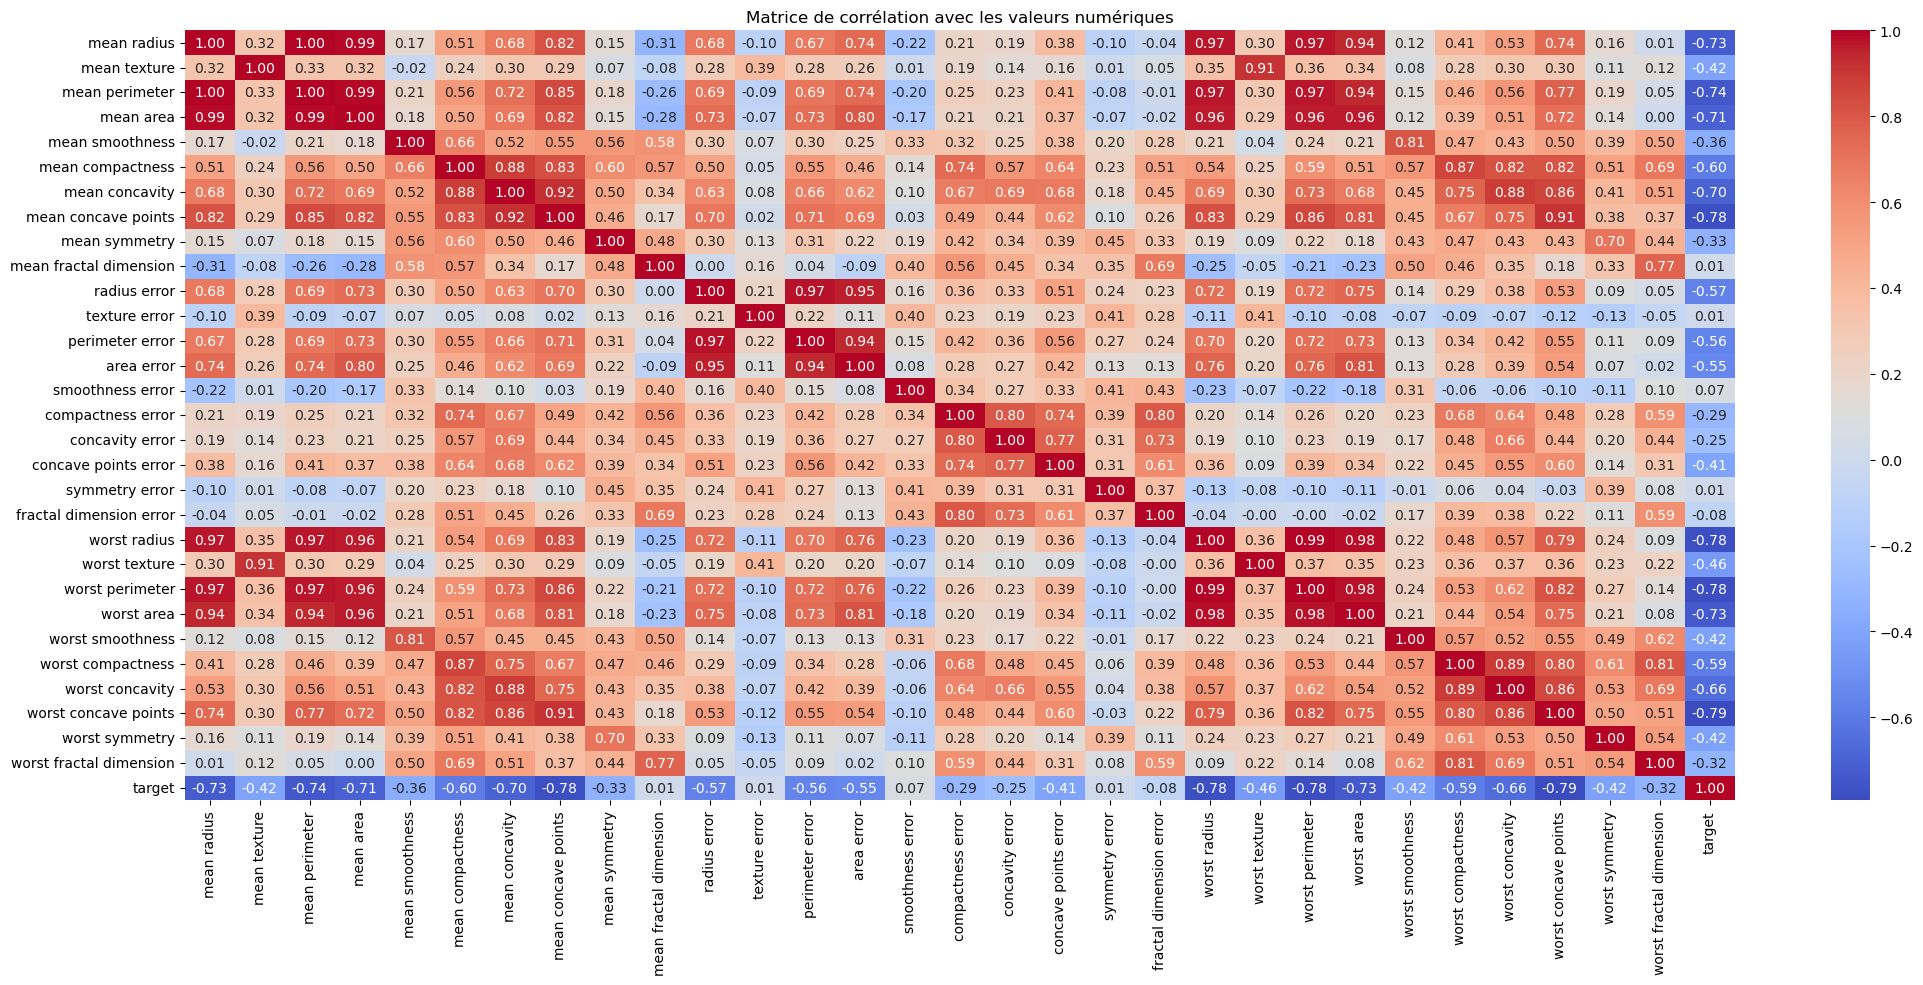

In [14]:
# Analyse de la corrélation entre les variables
correlation_matrix = bdd.corr()

# Affichage de la matrice de corrélation avec les valeurs
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation avec les valeurs numériques")
plt.show()

C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: F

C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
C:\Users\mathi\AppData\Local\Temp\ipykernel_6720\3332195697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bdd, x='target', y=column, palette='Set2')


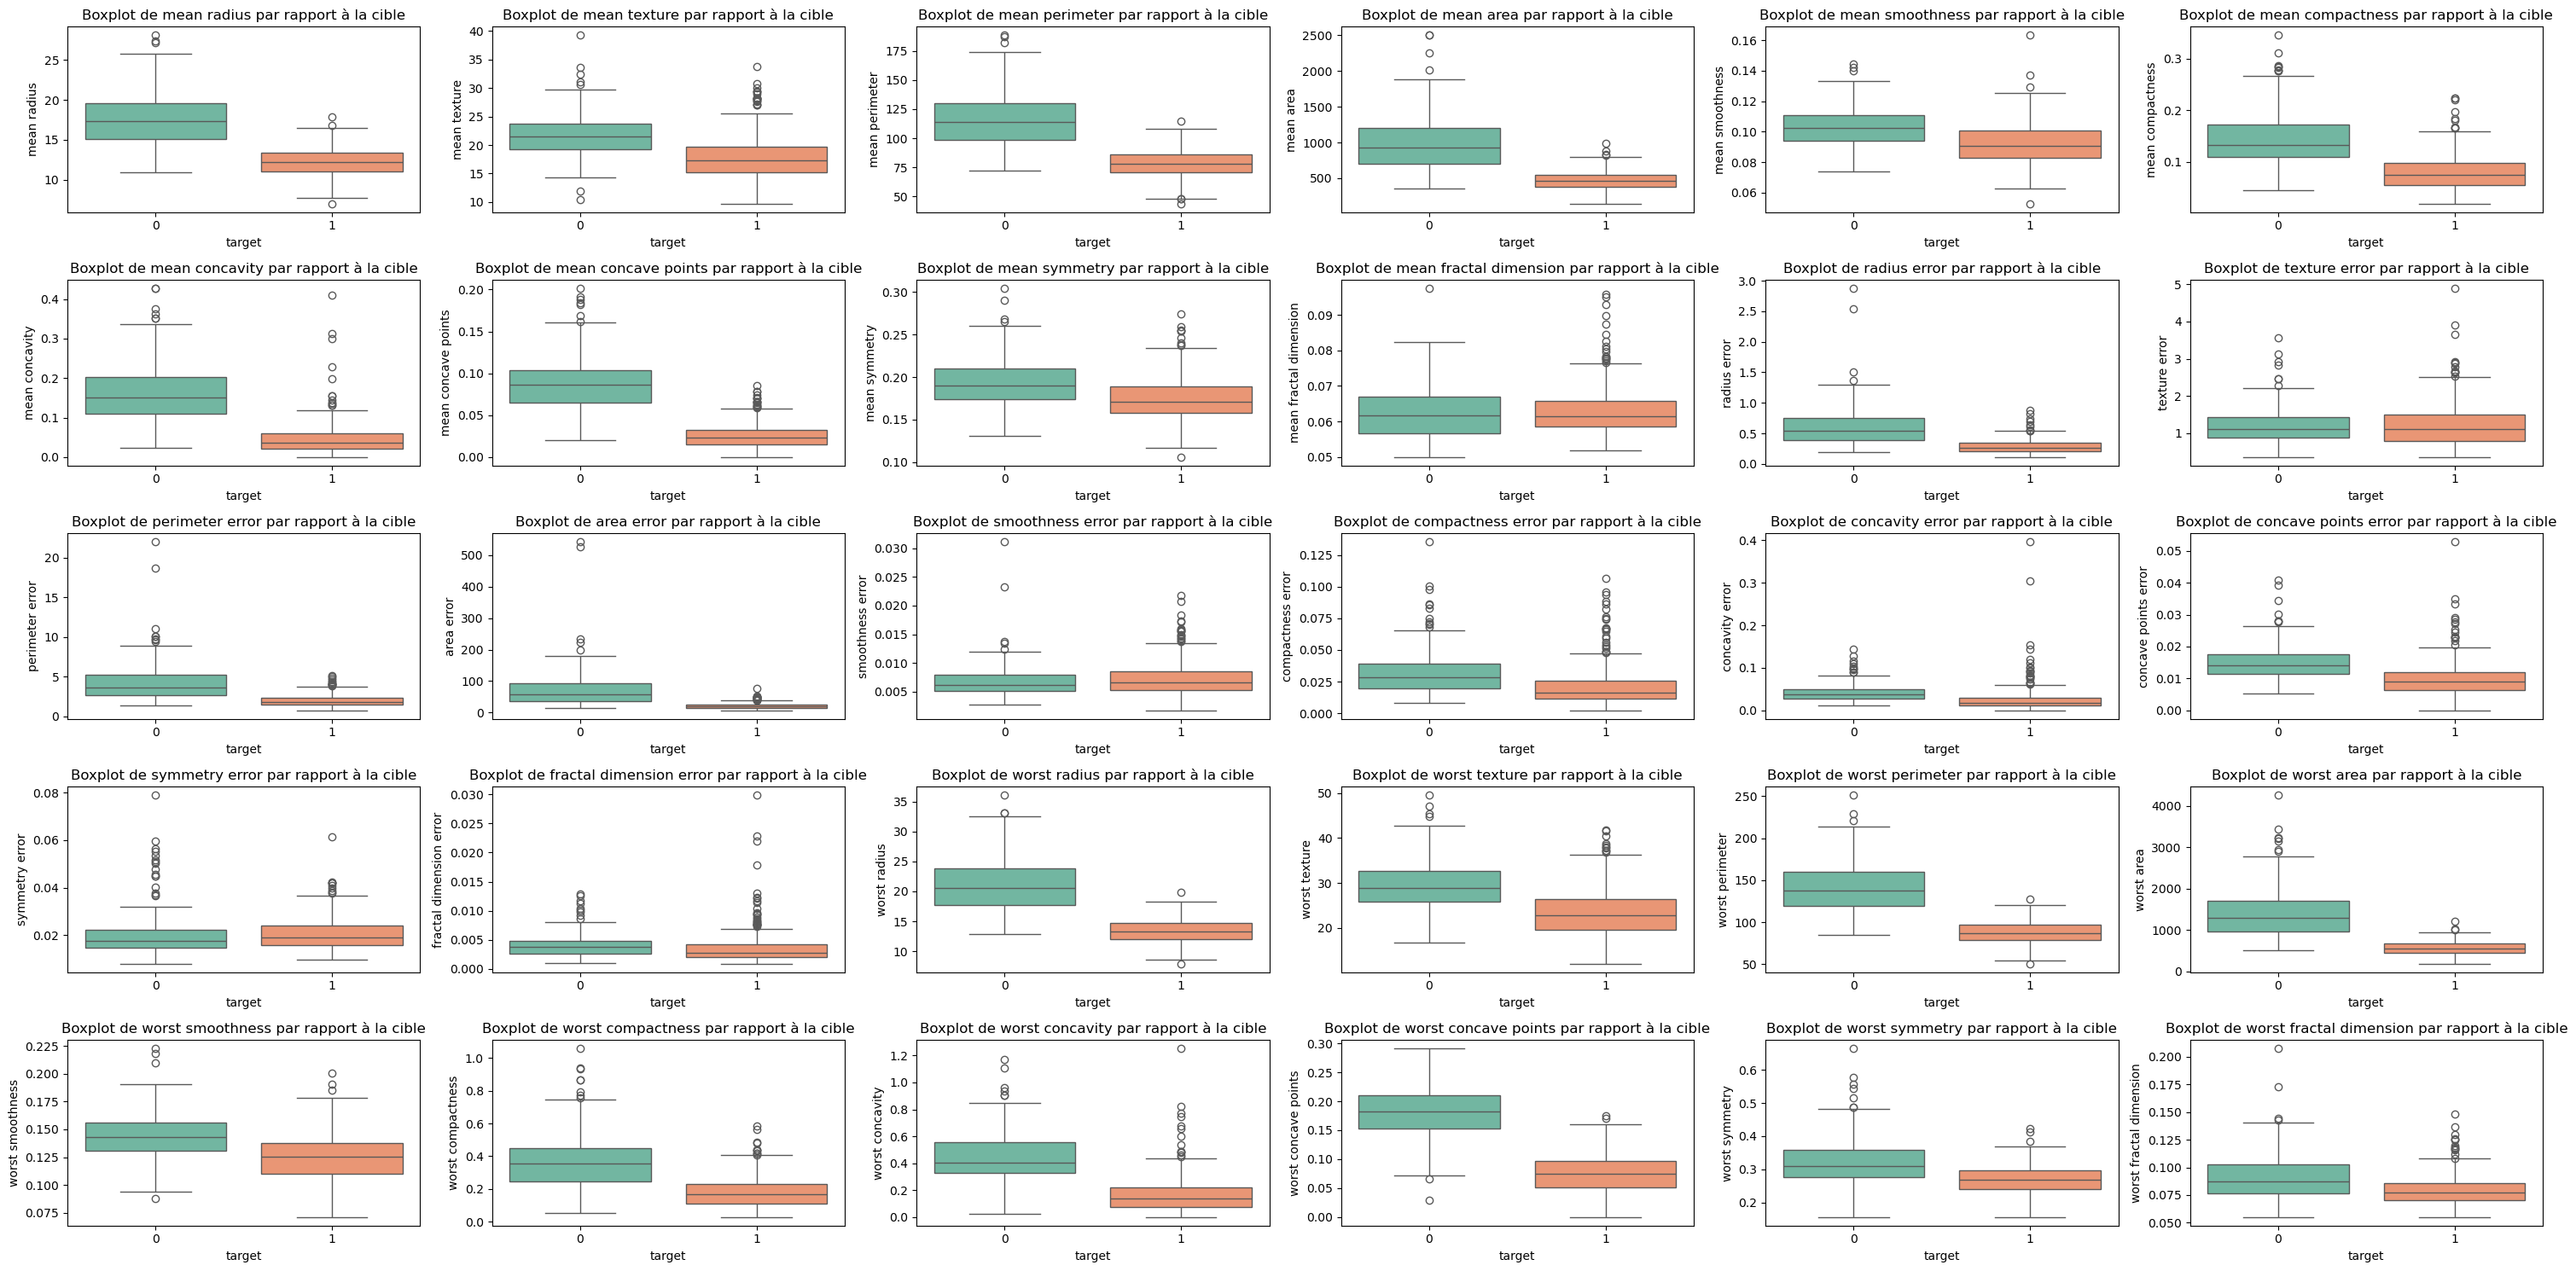

In [15]:
plt.figure(figsize=(30, 15))
for i, column in enumerate(bdd.columns[:-1], 1):  # Exclut la colonne cible
    plt.subplot(5, 6, i)  # Ajuster en fonction du nombre de colonnes
    sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
    plt.title(f"Boxplot de {column} par rapport à la cible")
    plt.tight_layout()
plt.show()

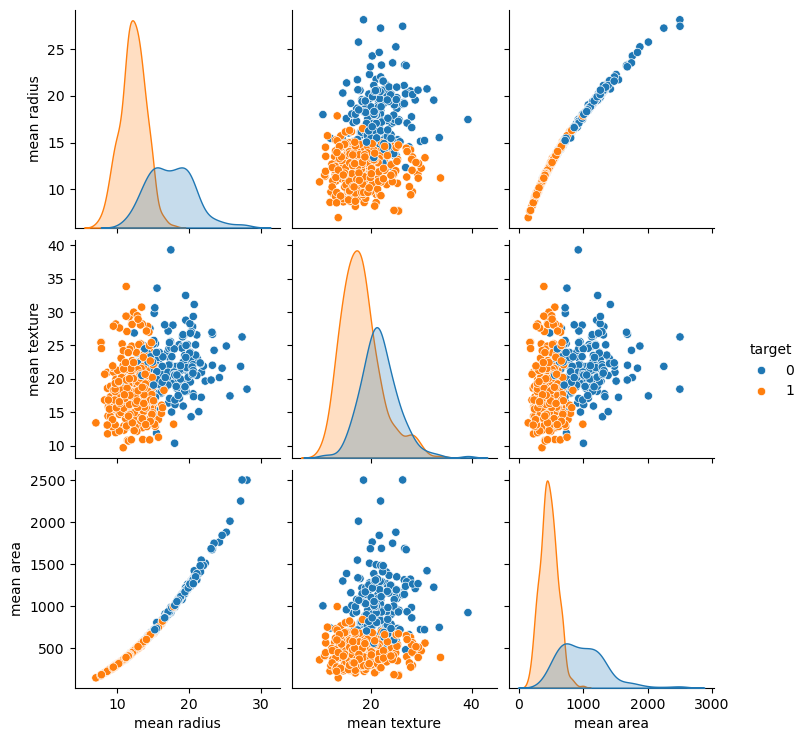

In [16]:
# Visualisation de la relation entre quelques variables et la cible
sns.pairplot(bdd, vars=['mean radius', 'mean texture', 'mean area'], hue='target', diag_kind="kde")
plt.show()

In [17]:
# Calcul des moyennes par classe
bdd.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


###### Statistiques multivariées

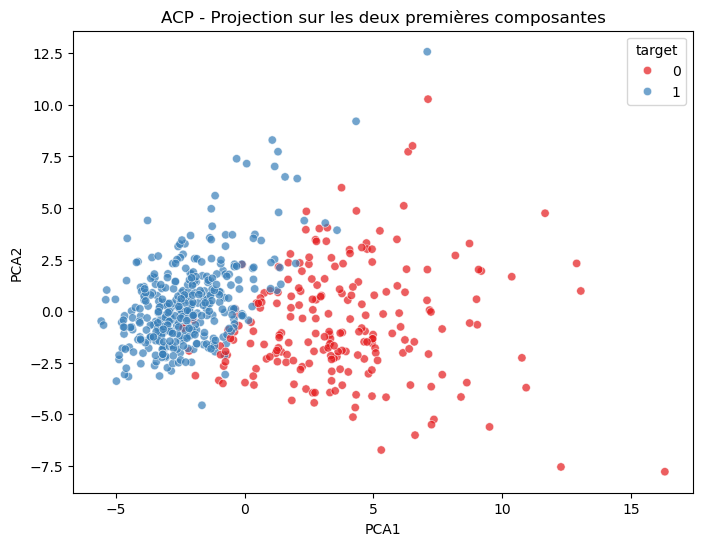

Variance expliquée par les premières composantes : [0.44272026 0.63243208]


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bdd.drop(columns=['target']))

# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des deux premières composantes
pca_bdd = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_bdd['target'] = bdd['target']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_bdd, x='PCA1', y='PCA2', hue='target', palette='Set1', alpha=0.7)
plt.title("ACP - Projection sur les deux premières composantes")
plt.show()

# Variance expliquée
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliquée par les premières composantes :", explained_variance[:5])

#### 3) Recoder les variables si nécessaire


Les variables sont au bon format, il n'est donc pas nécessaire de les recoder.

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

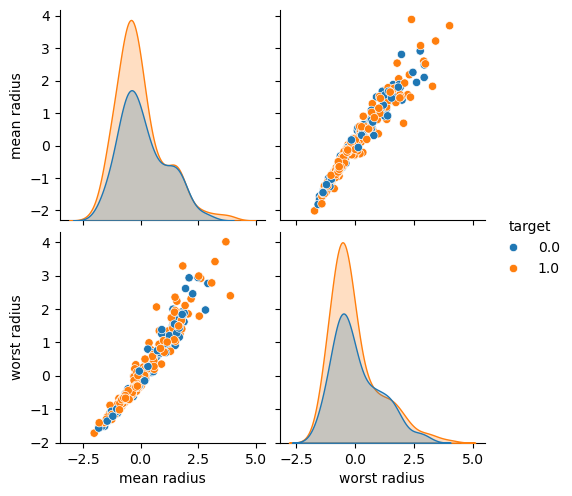

mean radius    -0.061409
worst radius   -0.047279
dtype: float64


In [19]:
# Visualiser les relations entre caractéristiques et cible

sns.pairplot(X_train_scaled[['mean radius', 'worst radius']].assign(target=y_train), hue='target')
plt.show()

# Évaluer la corrélation avec la cible
correlations = X_train_scaled[['mean radius', 'worst radius']].corrwith(y_train)
print(correlations)

In [20]:
X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

In [21]:
X_train_2_features.count()
X_test_2_features.count()

mean radius     114
worst radius    114
dtype: int64

## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [22]:
# Initialisation des modèles
# Descente de gradient stochastique
sgd_clf = SGDClassifier(random_state=77, max_iter=1000, tol=1e-3)

# SVM avec noyau RBF
svc_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=77)

# Régression logistique
log_reg = LogisticRegression(max_iter=1000, random_state=77)

# Liste des modèles pour simplifier les itérations
models = {
    "SGDClassifier": sgd_clf,
    "SVC": svc_clf,
    "LogisticRegression": log_reg
}

# Exemple : Entraîner les modèles et afficher leur type
for name, model in models.items():
    model.fit(X_train_2_features, y_train)  # Entraînement sur les deux caractéristiques sélectionnées
    print(f"{name} entraîné avec succès.")

SGDClassifier entraîné avec succès.
SVC entraîné avec succès.
LogisticRegression entraîné avec succès.


In [23]:
# Évaluation des modèles
for name, model in models.items():
    y_pred = model.predict(X_test_2_features)  # Prédictions sur le jeu de test
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Précision : {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

SGDClassifier - Précision : 0.90
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        39
           1       0.87      1.00      0.93        75

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.88       114
weighted avg       0.92      0.90      0.90       114

SVC - Précision : 0.93
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

LogisticRegression - Précision : 0.95
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.95      0.97      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.94 

C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


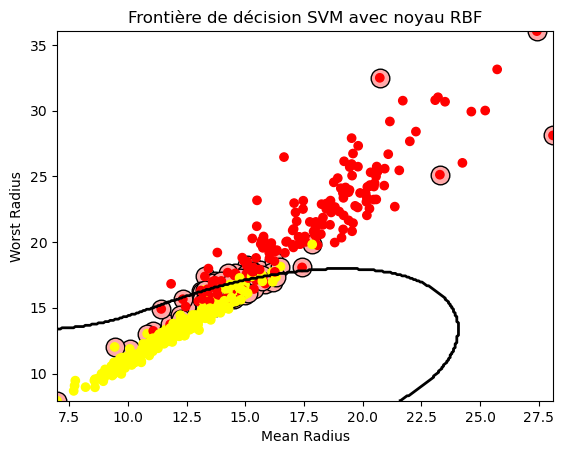

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Entraîner le modèle SVM avec noyau RBF
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_2_features, y_train)

# Fonction pour tracer la frontière de décision pour un SVM avec noyau non linéaire (RBF)
def plot_svc_decision_boundary_rbf(svm_clf, X, xmin, xmax, ymin, ymax):
    # Créer une grille de points pour afficher la frontière de décision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    # Prédictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer la frontière de décision et les marges
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    # Tracer les vecteurs de support
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')

# Plot la frontière de décision
plot_svc_decision_boundary_rbf(model, X_train_2_features, 
                               X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                               X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max())

# Ajouter les données
plt.scatter(X_train_2_features['mean radius'], X_train_2_features['worst radius'], c=y_train, cmap='autumn')
plt.xlabel('Mean Radius')
plt.ylabel('Worst Radius')
plt.title('Frontière de décision SVM avec noyau RBF')
plt.show()

C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


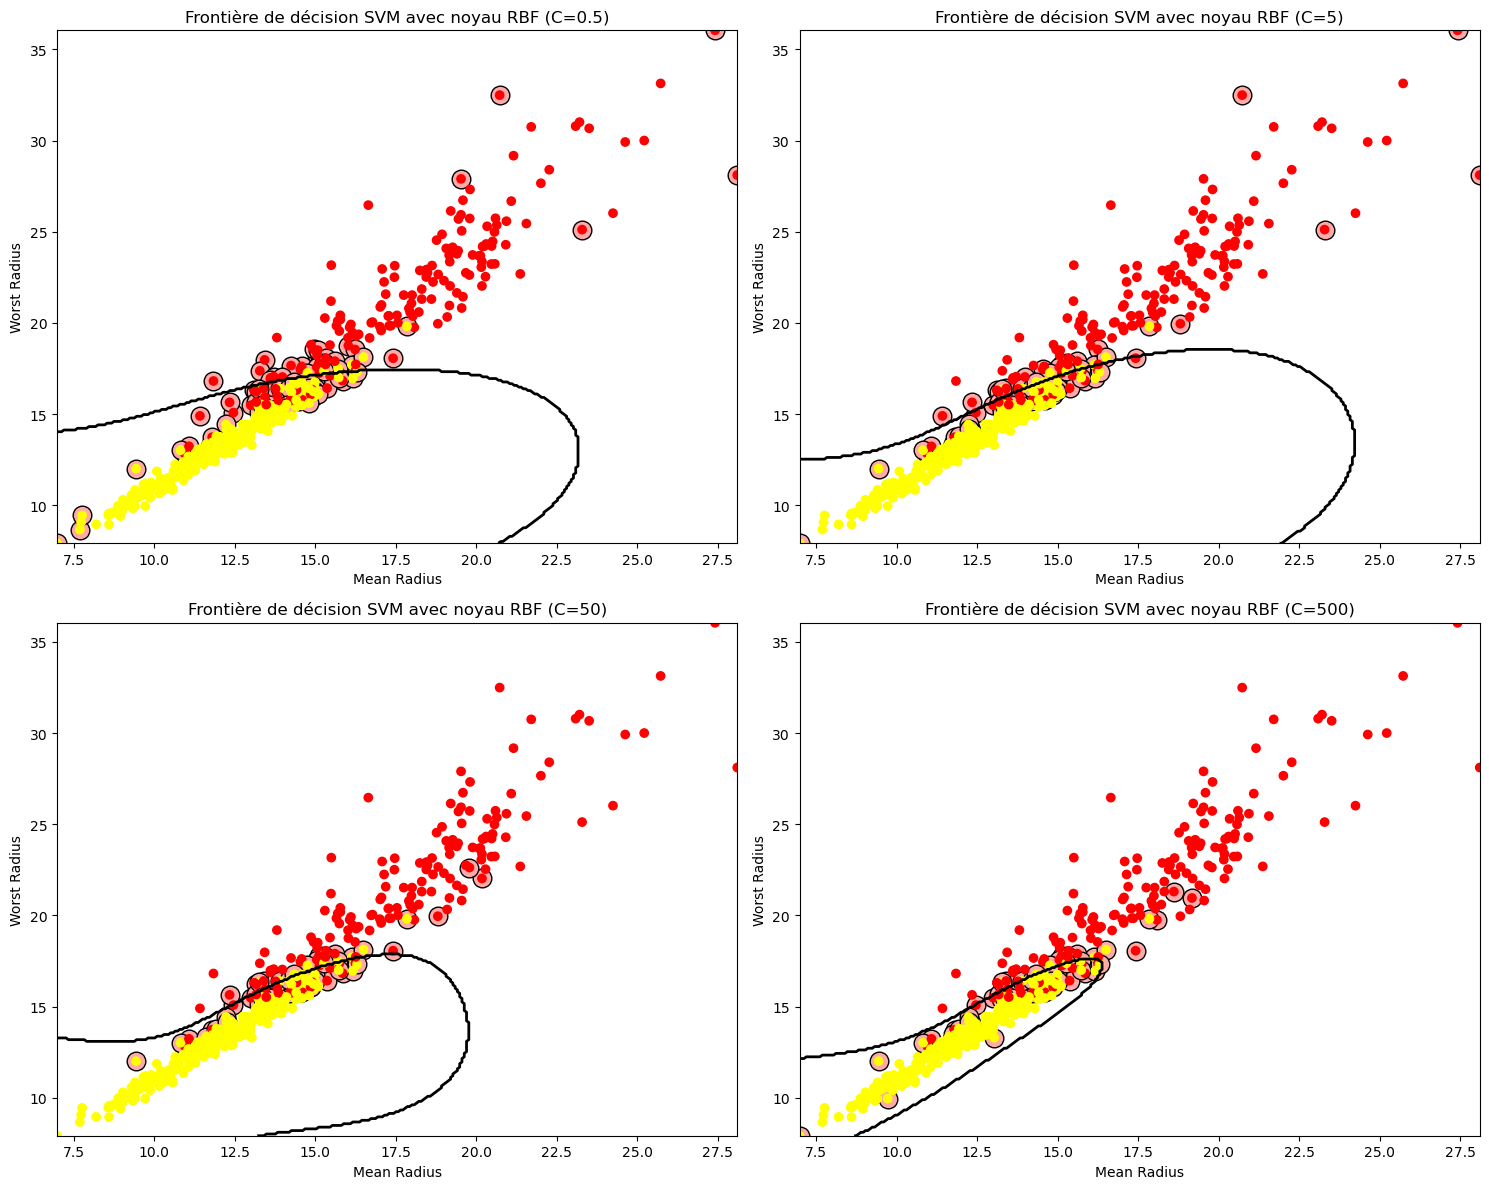

In [25]:
# Liste des valeurs de C à tester
C_values = [0.5, 5, 50, 500]

# Créer une figure pour afficher les frontières de décision
plt.figure(figsize=(15, 12))

# Boucle pour entraîner et afficher les frontières de décision pour chaque valeur de C
for i, C in enumerate(C_values, start=1):
    # Entraîner le modèle SVM avec noyau RBF et la valeur de C
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train_2_features, y_train)

    # Créer un sous-graphique pour chaque valeur de C
    plt.subplot(2, 2, i)
    plot_svc_decision_boundary_rbf(model, X_train_2_features, 
                                   X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                                   X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max())
    
    # Ajouter les données
    plt.scatter(X_train_2_features['mean radius'], X_train_2_features['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(f'Frontière de décision SVM avec noyau RBF (C={C})')
    
# Afficher les graphiques
plt.tight_layout()
plt.show()

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

##### 6.1) Garder uniquement **2 features** pour cette partie

mean radius et worst radius

##### 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau

Nous testons les différents noyaux (linear, poly, rbf, sigmoid).

C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


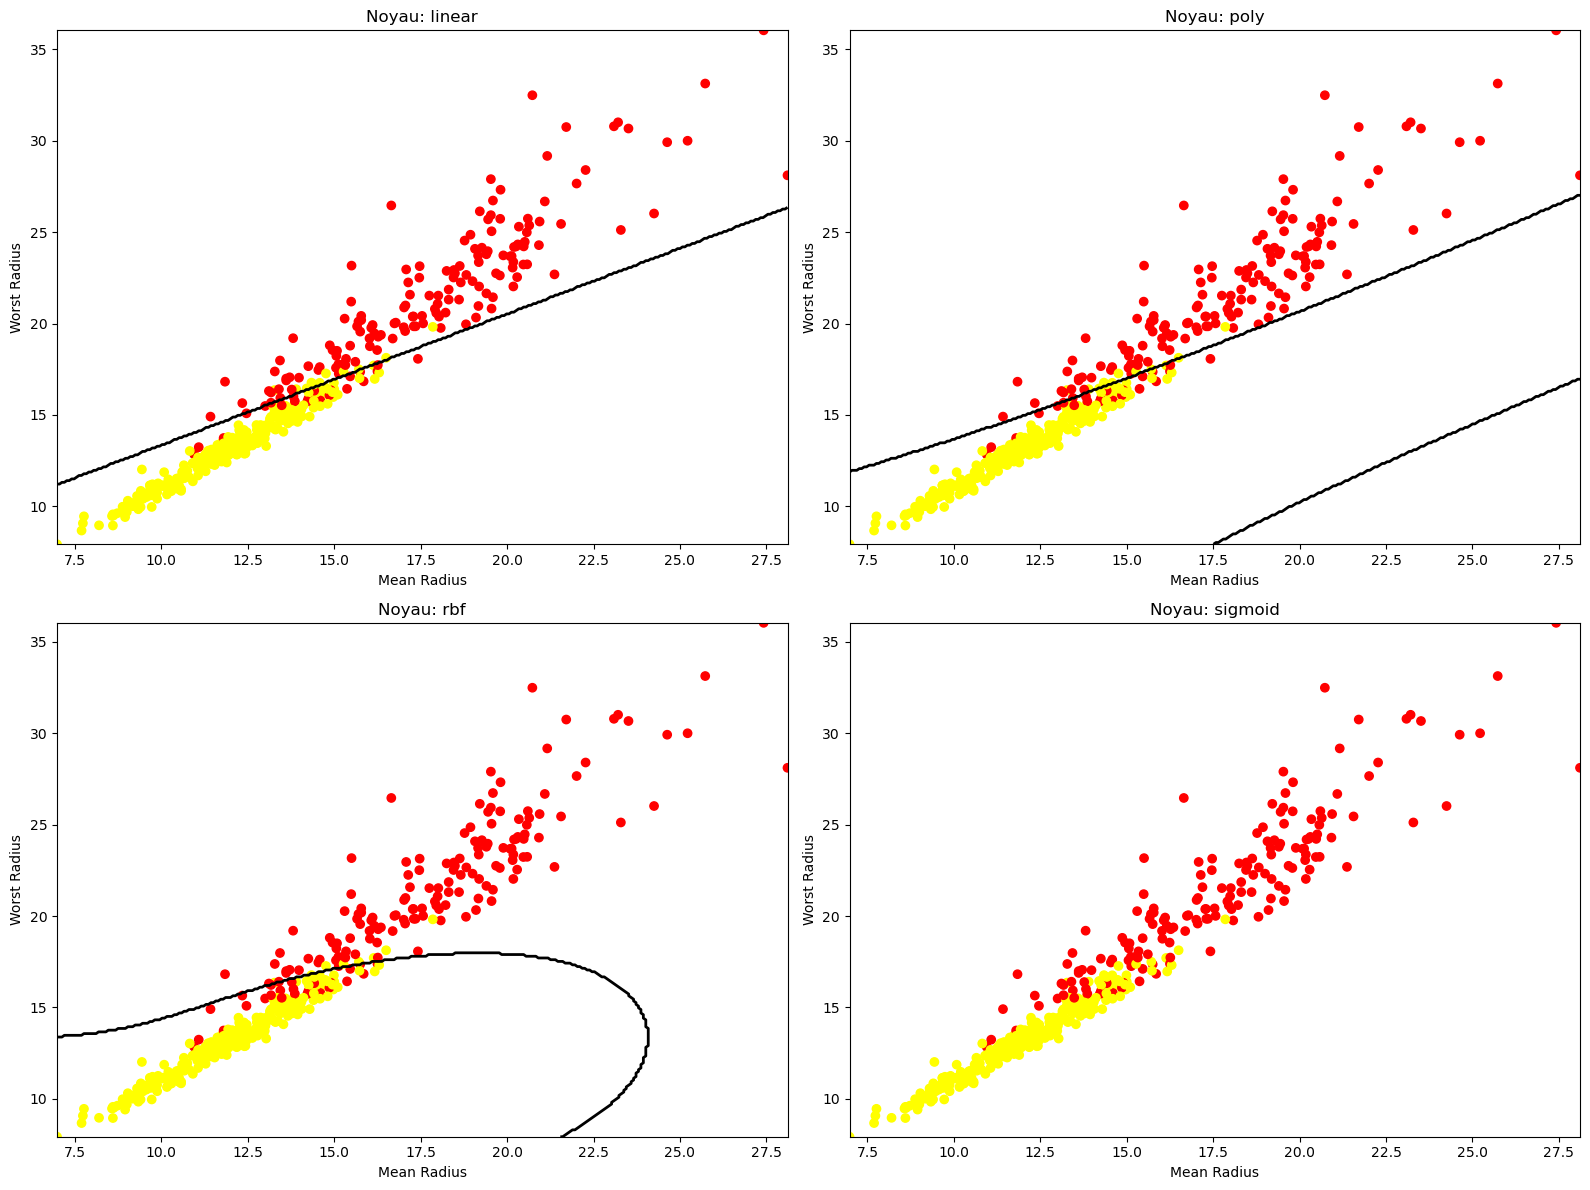

In [26]:
# Fonction pour tracer la frontière de décision et les prédictions
def plot_predictions(svm_clf, X, xmin, xmax, ymin, ymax, title):
    # Créer une grille de points pour afficher la frontière de décision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    # Prédictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer la frontière de décision
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    # Tracer les points de données
    plt.scatter(X['mean radius'], X['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(title)

# Garder les deux caractéristiques
X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

# Liste des noyaux à tester
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Créer une figure pour afficher les frontières de décision pour chaque noyau
plt.figure(figsize=(16, 12))

# Boucle pour tester les différents noyaux
for i, kernel in enumerate(kernels, start=1):
    # Entraîner le modèle SVM avec le noyau spécifié
    model = SVC(kernel=kernel, C=1, gamma='scale', random_state=77)
    model.fit(X_train_2_features, y_train)

    # Créer un sous-graphique pour chaque noyau
    plt.subplot(2, 2, i)
    plot_predictions(model, X_train_2_features, 
                     X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                     X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max(),
                     f'Noyau: {kernel}')

plt.tight_layout()
plt.show()

##### 6.3) Varier les autres hyperparamètres en plus du kernel

Nous testons différentes valeurs de C et gamma pour chaque noyau (linear, poly, rbf, sigmoid).

C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

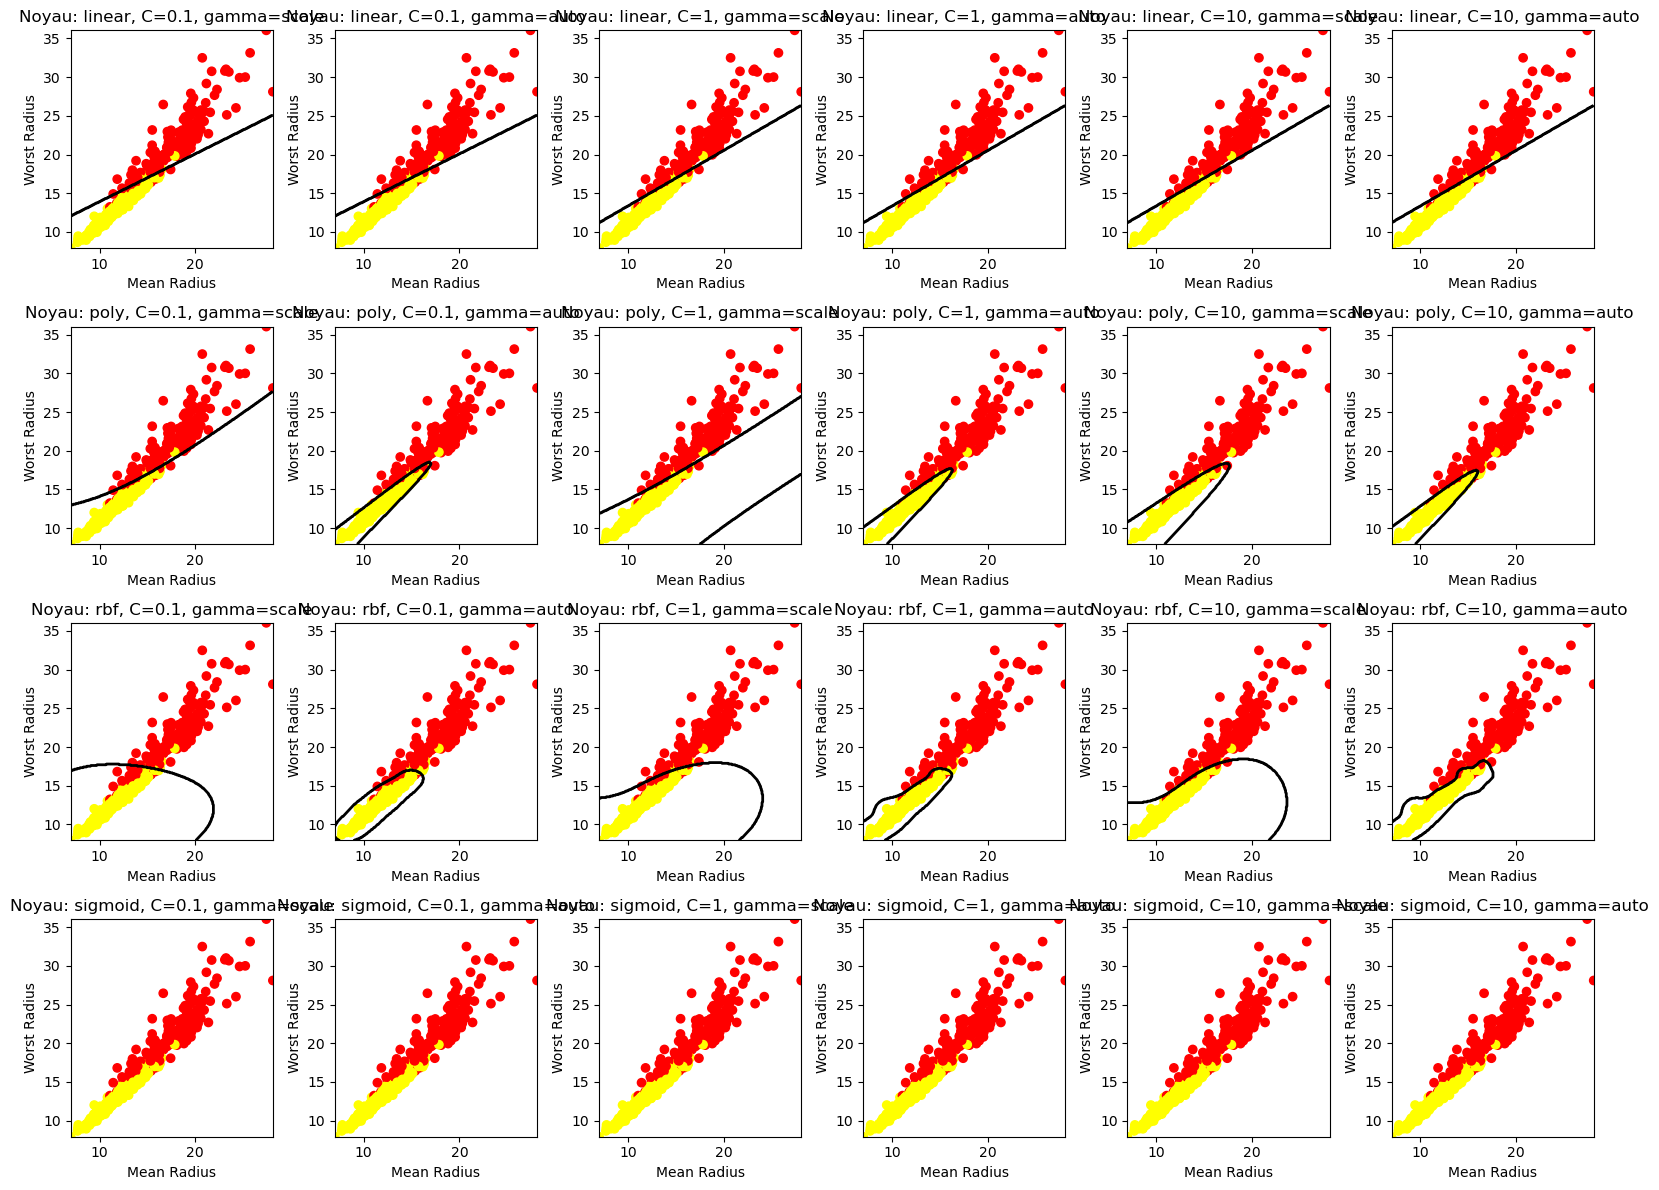

In [27]:
# Fonction pour tracer la frontière de décision et les prédictions
def plot_predictions(svm_clf, X, xmin, xmax, ymin, ymax, title):
    # Créer une grille de points pour afficher la frontière de décision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    # Prédictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Tracer la frontière de décision
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    # Tracer les points de données
    plt.scatter(X['mean radius'], X['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(title)

# Garder les deux caractéristiques
X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

# Liste des noyaux à tester
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Liste des valeurs d'hyperparamètres à tester
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

# Calculer le nombre total de sous-graphes nécessaires
num_subplots = len(kernels) * len(C_values) * len(gamma_values)

# Créer une figure pour afficher les frontières de décision pour chaque combinaison de noyau, C et gamma
plt.figure(figsize=(16, 12))

# Boucle pour tester les différents noyaux et les valeurs d'hyperparamètres
index = 1
for i, kernel in enumerate(kernels, start=1):
    for j, C in enumerate(C_values):
        for k, gamma in enumerate(gamma_values):
            # Entraîner le modèle SVM avec le noyau et les hyperparamètres
            model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=77)
            model.fit(X_train_2_features, y_train)

            # Créer un sous-graphique pour chaque combinaison de noyau, C et gamma
            plt.subplot(len(kernels), len(C_values) * len(gamma_values), index)
            plot_predictions(model, X_train_2_features, 
                             X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                             X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max(),
                             f'Noyau: {kernel}, C={C}, gamma={gamma}')

            # Incrémenter l'index pour le sous-graphique suivant
            index += 1

plt.tight_layout()
plt.show()

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [28]:
# Appliquer la sélection sur les données
features_selected = [
    'mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 
    'mean concavity', 'mean concave points', 'worst radius', 
    'worst texture', 'worst perimeter', 'worst area'
]

# Assurez-vous d'utiliser 'bdd' et non 'X' pour récupérer 'target'
X_selected = bdd[features_selected]  # Utilisation de bdd pour les features
y = bdd['target']  # 'target' se trouve dans bdd

# Vous pouvez maintenant séparer en train et test comme avant
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=77)

Accuracy for linear kernel: 0.9561
Accuracy for rbf kernel: 0.9386
Accuracy for poly kernel: 0.8947


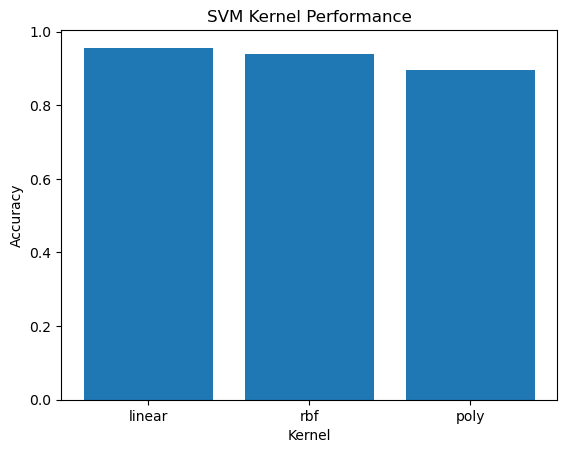

In [29]:
# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Liste des noyaux à tester
kernels = ['linear', 'rbf', 'poly']

# Créer un dictionnaire pour stocker les modèles et leurs performances
results = {}

# Entraîner les modèles SVM avec différents noyaux
for kernel in kernels:
    # Initialiser le modèle SVM avec le noyau choisi
    model = SVC(kernel=kernel, random_state=77)
    
    # Entraîner le modèle
    model.fit(X_train_scaled, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Stocker le résultat
    results[kernel] = accuracy

    # Afficher l'accuracy
    print(f"Accuracy for {kernel} kernel: {accuracy:.4f}")

# Afficher un graphique des résultats
plt.bar(results.keys(), results.values())
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance')
plt.show()


#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

Cross-validation score for SVC (linear): 0.9701
Cross-validation score for SVC (rbf): 0.9736
Cross-validation score for SGDClassifier: 0.9613
Cross-validation score for LogisticRegression: 0.9807


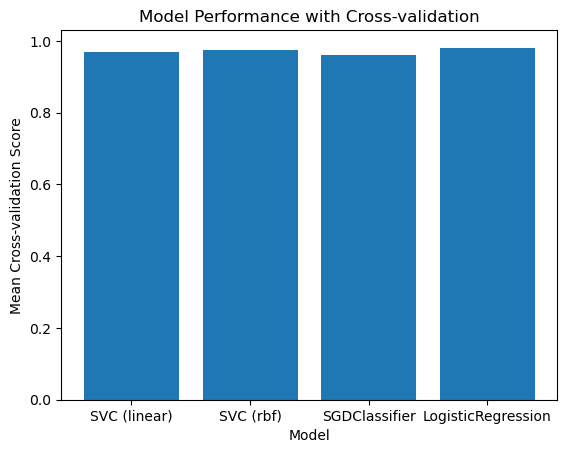

In [30]:
# Liste des modèles à tester
models = {
    "SVC (linear)": SVC(kernel='linear', random_state=77),
    "SVC (rbf)": SVC(kernel='rbf', random_state=77),
    "SGDClassifier": SGDClassifier(random_state=77, max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=77)
}

# Dictionnaire pour stocker les résultats
results = {}

# Effectuer la cross-validation pour chaque modèle
for name, model in models.items():
    # Calculer les scores de cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5 folds
    results[name] = cv_scores.mean()  # Moyenne des scores

    # Afficher les résultats
    print(f"Cross-validation score for {name}: {results[name]:.4f}")

# Afficher un graphique des résultats
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Mean Cross-validation Score')
plt.title('Model Performance with Cross-validation')
plt.show()


#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)


Confusion Matrix for SVC (linear):


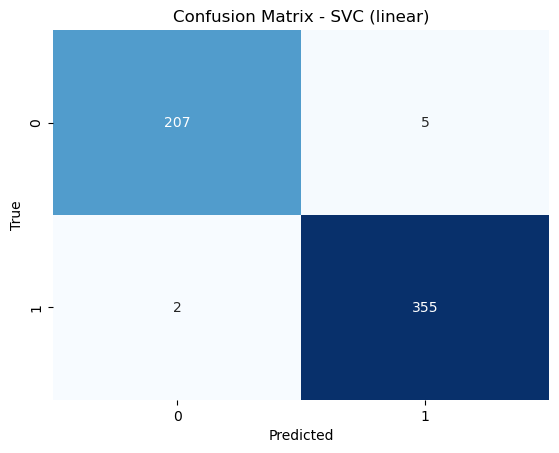

Classification Report for SVC (linear):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

Number of errors: 7
Sample of misclassified indices: [ 40  73 135 263 297 413 541]
Mean cross-validation score for SVC (linear): 0.9701

Confusion Matrix for SVC (rbf):


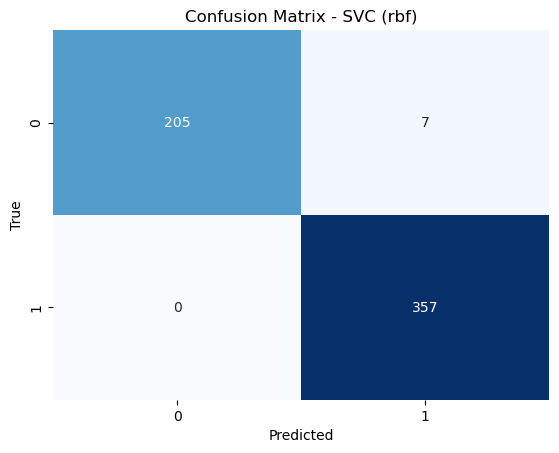

Classification Report for SVC (rbf):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       212
           1       0.98      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569

Number of errors: 7
Sample of misclassified indices: [ 40  73 135 255 263 297 514]
Mean cross-validation score for SVC (rbf): 0.9736

Confusion Matrix for SGDClassifier:


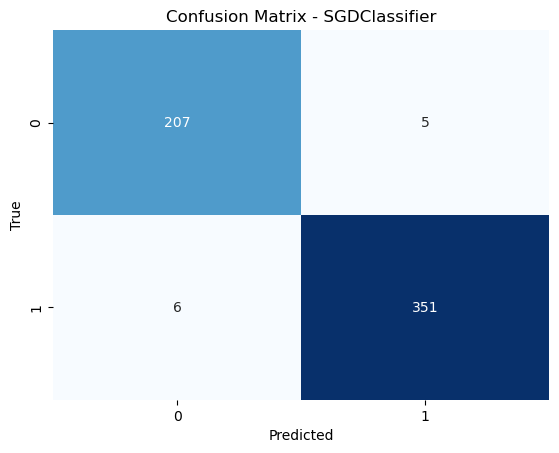

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       212
           1       0.99      0.98      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

Number of errors: 11
Sample of misclassified indices: [ 40  73 135 238 263 297 363 413 455 469]
Mean cross-validation score for SGDClassifier: 0.9613

Confusion Matrix for LogisticRegression:


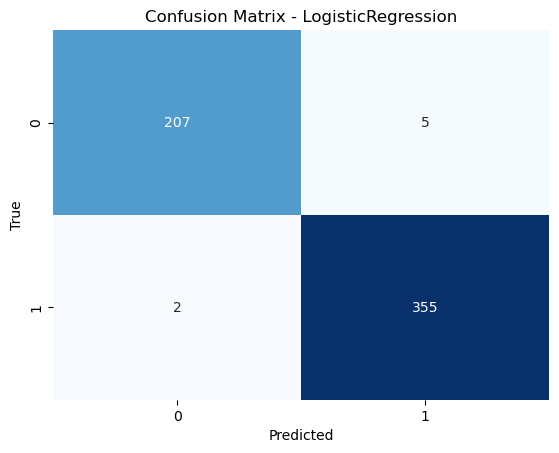

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

Number of errors: 7
Sample of misclassified indices: [ 40  73 135 263 297 413 541]
Mean cross-validation score for LogisticRegression: 0.9807


In [31]:
# Analyser les résultats pour chaque modèle
for name, model in models.items():
    # Effectuer un entraînement et une prédiction sur l'ensemble complet des données
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    
    # Afficher la matrice de confusion
    cm = confusion_matrix(y, y_pred)
    print(f"\nConfusion Matrix for {name}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Afficher le classification report pour avoir plus de métriques
    print(f"Classification Report for {name}:")
    print(classification_report(y, y_pred))
    
    # Afficher les erreurs de prédiction
    errors = np.where(y != y_pred)[0]
    print(f"Number of errors: {len(errors)}")
    print(f"Sample of misclassified indices: {errors[:10]}")  # Afficher quelques erreurs
    
    # Évaluer les scores de cross-validation
    print(f"Mean cross-validation score for {name}: {results[name]:.4f}")


1. **SVC (Noyau Linéaire)** :
Le modèle SVC avec noyau linéaire a montré d'excellentes performances avec une **précision** et un **rappel** proches de 1. Il a commis **7 erreurs**, avec un **score de validation croisée** de **0.9701**. Ce modèle est très stable et performant.

2. **SVC (Noyau RBF)** :
Le modèle SVC avec noyau RBF a aussi très bien performé, avec une **précision** de **1.00** pour la classe 0 et **0.98** pour la classe 1. Il a également commis **7 erreurs** et a obtenu un **score de validation croisée** de **0.9736**, légèrement meilleur que le noyau linéaire.

3. **SGDClassifier** :
Le **SGDClassifier** présente des résultats légèrement inférieurs, avec une **précision** de **0.97** pour la classe 0 et un **score de validation croisée** de **0.9613**. Il a commis **11 erreurs**, indiquant une sensibilité accrue au bruit dans les données.

4. **Logistic Regression** :
La **régression logistique** a montré des résultats similaires aux modèles SVC, avec une **précision** de **0.99** et un **score de validation croisée** de **0.9807**, le meilleur des modèles testés. Elle a commis **7 erreurs**, offrant ainsi une bonne stabilité.

Les modèles **SVC (linéaire)** et **Logistic Regression** sont les plus performants avec une bonne stabilité et un faible nombre d'erreurs. Le modèle **SVC (RBF)** est légèrement plus performant en validation croisée, tandis que le **SGDClassifier** est le moins stable et performant.

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


In [32]:
# Paramètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialisation du modèle SVC
svc = SVC(kernel='rbf')

# GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_2_features, y_train)

# Meilleur modèle trouvé
best_svc = grid_search_svc.best_estimator_

# Affichage des résultats
print("Meilleur modèle SVC (RBF):", grid_search_svc.best_params_)

Meilleur modèle SVC (RBF): {'C': 1, 'gamma': 'auto'}


In [33]:
# Meilleur modèle SVC (RBF) trouvé : {'C': 1, 'gamma': 'auto'}
best_svc = SVC(kernel='rbf', C=1, gamma='auto')

# Entraîner le modèle sur l'ensemble d'entraînement
best_svc.fit(X_train_2_features, y_train)

# Prédiction sur le jeu de test
y_pred = best_svc.predict(X_test_2_features)

# Évaluation des performances avec un classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [34]:
# Paramètres à tester
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 2000]
}

# Initialisation du modèle SGDClassifier
sgd_clf = SGDClassifier()

# GridSearchCV
grid_search_sgd = GridSearchCV(sgd_clf, param_grid_sgd, cv=5, scoring='accuracy')
grid_search_sgd.fit(X_train_2_features, y_train)

# Meilleur modèle trouvé
best_sgd = grid_search_sgd.best_estimator_

# Affichage des résultats
print("Meilleur modèle SGDClassifier:", grid_search_sgd.best_params_)

Meilleur modèle SGDClassifier: {'alpha': 0.01, 'max_iter': 1000}


In [35]:
# Meilleur modèle SGDClassifier trouvé : {'alpha': 0.01, 'max_iter': 1000}
best_sgd = SGDClassifier(alpha=0.01, max_iter=1000, random_state=77)

# Entraîner le modèle sur l'ensemble d'entraînement
best_sgd.fit(X_train_2_features, y_train)

# Prédiction sur le jeu de test
y_pred_sgd = best_sgd.predict(X_test_2_features)

# Évaluation des performances avec un classification report
print("Classification Report pour SGDClassifier:")
print(classification_report(y_test, y_pred_sgd))

Classification Report pour SGDClassifier:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.95      0.92      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114



In [36]:
# Paramètres à tester
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Initialisation du modèle LogisticRegression
log_reg = LogisticRegression()

# GridSearchCV
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_2_features, y_train)

# Meilleur modèle trouvé
best_lr = grid_search_lr.best_estimator_

# Affichage des résultats
print("Meilleur modèle LogisticRegression:", grid_search_lr.best_params_)

Meilleur modèle LogisticRegression: {'C': 10, 'solver': 'liblinear'}


C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mathi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

In [37]:
# Meilleur modèle LogisticRegression trouvé : {'C': 10, 'solver': 'liblinear'}
best_log_reg = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=77)

# Entraîner le modèle sur l'ensemble d'entraînement
best_log_reg.fit(X_train_2_features, y_train)

# Prédiction sur le jeu de test
y_pred_log_reg = best_log_reg.predict(X_test_2_features)

# Évaluation des performances avec un classification report
print("Classification Report pour LogisticRegression:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report pour LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Le modèle **LogisticRegression** obtient le meilleur **f1-score global** et la meilleure **précision globale**. 

**SVC** et **SGDClassifier** montrent des résultats compétitifs, mais SVC a un **rappel supérieur** pour la classe 1.


In [38]:
# Prédiction sur le jeu de test avec le meilleur modèle
y_pred = best_log_reg.predict(X_test_2_features)

In [39]:
# Évaluation des performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [40]:
# Prédiction sur le jeu de test avec le meilleur modèle
y_pred = best_sgd.predict(X_test_2_features)

In [41]:
# Évaluation des performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.95      0.92      0.93        75

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.91      0.91       114



In [42]:
# Prédiction sur le jeu de test avec le meilleur modèle
y_pred = best_svc.predict(X_test_2_features)

In [43]:
# Évaluation des performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



Le modèle **Logistic Regression** est le plus performant pour prédire le cancer du sein, avec une précision de 0.97 pour les cas non cancéreux et 0.94 pour les cas cancéreux. Il présente un excellent recall de 0.99 pour la classe cancéreuse, ce qui signifie qu'il est très efficace pour détecter les cas positifs. Cependant, il montre une performance plus faible pour la classe non cancéreuse (recall de 0.87). Comparé aux autres modèles, **SGDClassifier** et **SVC** ont des performances similaires mais légèrement inférieures, surtout pour la détection des cas non cancéreux. Le modèle logistique semble donc être le choix optimal pour ce problème de classification.

<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>

Grave